In [1]:
import pandas as pd
df = pd.read_csv('./train.csv')

In [2]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [5]:
df["Fare"] = pd.to_numeric(df["Fare"])
pd.DataFrame(df.dtypes)

0
PassengerId    int64
Survived       int64
Pclass         int64
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked      object

In [6]:
df["Sex"] = df["Sex"].map({'male':1, 'female':0})
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886                              Montvila, Rev. Juozas    1  27.0      0   
887                       Graham, Miss. Margaret Edith    0  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"    0   NaN      1   
889                              Behr, Mr. Karl Howell    1  26.0      0   
890                                Dooley, Mr. Patrick    1  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [7]:
df1 = df.drop(["Name", "Ticket", "Cabin", "Embarked"], axis=1, inplace=False)
df1.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0            1         0       3    1  22.0      1      0   7.2500
1            2         1       1    0  38.0      1      0  71.2833
2            3         1       3    0  26.0      0      0   7.9250
3            4         1       1    0  35.0      1      0  53.1000
4            5         0       3    1  35.0      0      0   8.0500

In [8]:
df2 = df1.dropna()
df2

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0              1         0       3    1  22.0      1      0   7.2500
1              2         1       1    0  38.0      1      0  71.2833
2              3         1       3    0  26.0      0      0   7.9250
3              4         1       1    0  35.0      1      0  53.1000
4              5         0       3    1  35.0      0      0   8.0500
..           ...       ...     ...  ...   ...    ...    ...      ...
885          886         0       3    0  39.0      0      5  29.1250
886          887         0       2    1  27.0      0      0  13.0000
887          888         1       1    0  19.0      0      0  30.0000
889          890         1       1    1  26.0      0      0  30.0000
890          891         0       3    1  32.0      0      0   7.7500

[714 rows x 8 columns]

In [9]:
from sklearn.model_selection import train_test_split

y = df2.Survived
x = df2.drop(['Survived'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state = 42)

In [10]:
print(x_train.shape, x_test.shape)
print(df2.shape)

(571, 7) (143, 7)
(714, 8)


In [11]:
y_train.sample(10)

722    0
448    1
456    0
218    1
606    0
438    0
625    0
348    1
393    1
651    1
Name: Survived, dtype: int64

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=23, max_features=2)
rf.fit(X=x_train, y=y_train)

RandomForestClassifier(max_features=2, random_state=23)

In [13]:
def print_score(learn_obj, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
	print("Score train : ", learn_obj.score(x_train, y_train,)*100, "%")
	print("Score test : ", learn_obj.score(x_test, y_test,)*100, "%")

print_score(rf)

train 1.0
test 0.8181818181818182


# Explicabilité

In [14]:
pd.DataFrame(rf.feature_importances_, x_train.columns)

0
PassengerId  0.183845
Pclass       0.082249
Sex          0.252636
Age          0.203642
SibSp        0.037171
Parch        0.037001
Fare         0.203456

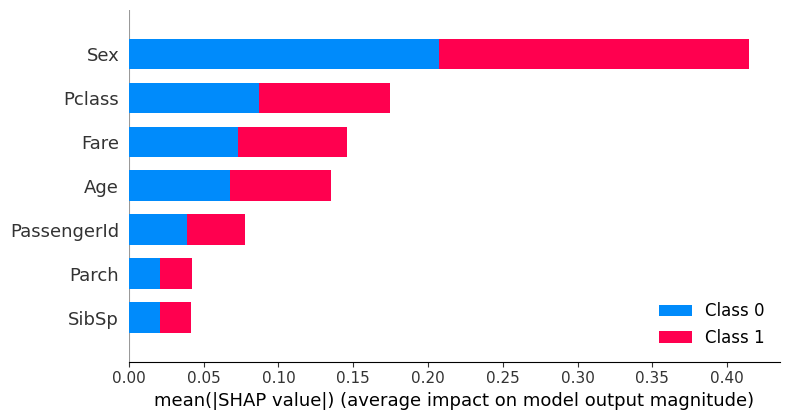

In [15]:
import shap

shpv = shap.TreeExplainer(rf).shap_values(x_train)
shap.summary_plot(shpv, x_train)

 # Viz

In [16]:
from pandas_profiling import ProfileReport

dd = pd.read_csv('./train.csv')
profile = ProfileReport(dd)
# profile.to_file('profile.html')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Graphique explication influence sexe dans mortalité

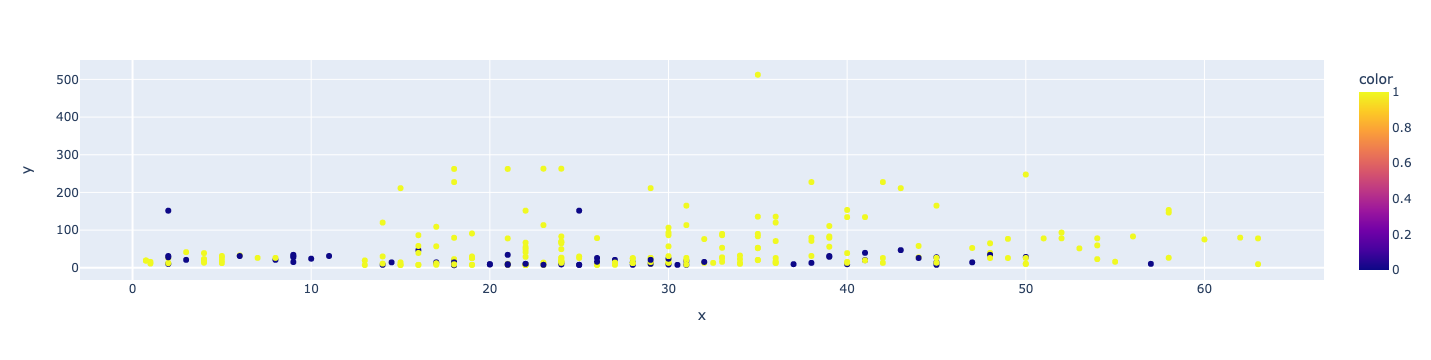

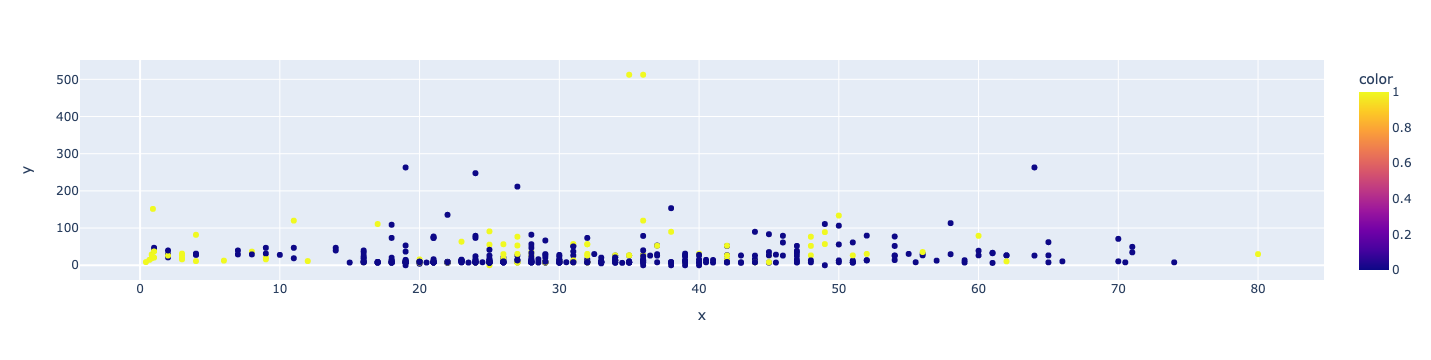

In [21]:
import plotly.express as px

female_train = dd[dd["Sex"] == 'female']
fig = px.scatter(x=female_train['Age'], y=female_train['Fare'], color=female_train['Survived'])
fig.show()

male_train = dd[dd["Sex"] == 'male']
fig = px.scatter(x=male_train['Age'], y=male_train['Fare'], color=male_train['Survived'])
fig.show()

# En utilisant une fonction
def graph_scatter_age(dd):
	fig = px.scatter(x=dd['Age'], y=dd['Fare'], color=dd['Survived'])
	fig.show()
# graph_scatter_age(dd[dd["Sex"] == 'female'])

<AxesSubplot: >

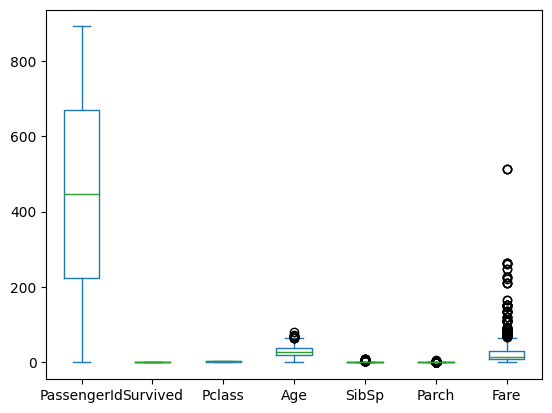

In [18]:
dd.plot.box()

<AxesSubplot: >

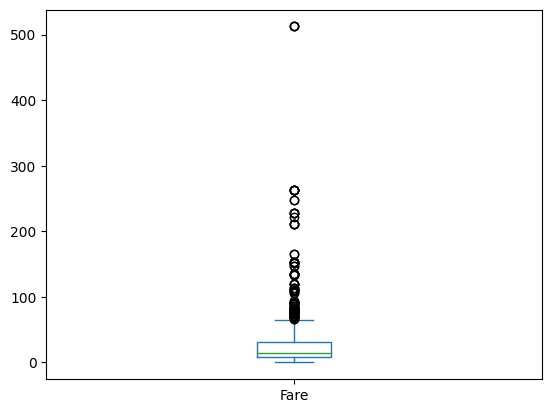

In [19]:
dd.Fare.plot.box()

In [20]:
dd.Fare.mean()

32.204207968574636

In [23]:
from sklearn.linear_model import RidgeClassifier

rc = RidgeClassifier()
rc.fit(X=x_train, y=y_train)

print_score(rc)

Score train :  80.38528896672504 %
Score test :  74.82517482517483 %
